<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Germán Urrea
- Nombre de alumno 2: Antonia Villegas


### **Link de repositorio de GitHub:** `https://github.com/G-Urrea/labs_mds-german-antonia`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [3]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gdown

filename = 'online_retail_II_cleaned.pickle'

try:
  df_retail = pd.read_pickle(filename)
except:
  url = 'https://drive.google.com/uc?id=1YcvMtWpT7AMhnb2aycGCSbn2ULJd23kk'
  gdown.download(url,filename, quiet=False)
  df_retail = pd.read_pickle(filename)

df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail


Downloading...
From: https://drive.google.com/uc?id=1YcvMtWpT7AMhnb2aycGCSbn2ULJd23kk
To: /content/online_retail_II_cleaned.pickle
100%|██████████| 20.3M/20.3M [00:00<00:00, 146MB/s]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400942,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400943,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400944,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400945,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**Ejemplo de Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

In [68]:
def periodicity(series):
  '''
  Input:
    series: Pandas Series. Secuencia de fechas (Pandas datetime) no necesariamente ordenadas y unicas.
  Retorna:
    periodicity: Float. Periodicidad en días, según LRMFP.

  '''
  # Obtener fechas únicas
  unique_series = series.unique()
  # Si no hay suficientes fechas, se define que no hay periodicidad
  if len(unique_series)<=1:
    return 0.0
  # Ordenar fechas en orden ascendiente (t_1, t_2,...,t_n)
  unique_series.sort()
  # Calcular diferencia entre fechas (t_2-t_1,...., t_n-t_n-1)
  diff_series = np.diff(unique_series).astype('timedelta64[D]').astype(float)
  # Obtener periodicidad
  periodicity = np.std(diff_series)
  return periodicity

A continuación, algunos supuestos respecto a los calculos:
-  Se considera una visita como una compra, en este sentido, un cliente puede visitar la tienda multiples veces en un día
- Para un cliente que sólo ha visitado la tienda una vez, se le considera su periodicity como 0, dado que no tiene regularidad para visitar la tienda.

In [72]:
def custom_features(dataframe):
    # Convertir las columnas de fechas al tipo datetime
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    # Obtener dinero gastado
    dataframe['Spent'] = dataframe['Price']*dataframe['Quantity']

    # Calcular la longitud (Length) para cada observación
    length = dataframe.groupby('Customer ID')['InvoiceDate'].apply(lambda x: (x.max() - x.min()).days)

    # Calcular la recency (Recency) para cada observación
    recency = dataframe.groupby('Customer ID')['InvoiceDate'].apply(lambda x: (pd.Timestamp.now() - x.max()).days)

    # Calcular la monetary (Monetary) para cada observación: mean(Quantity*Price)
    monetary = dataframe.groupby('Customer ID')['Spent'].mean()

    # Calcular la frequency (Frequency) para cada observación. Se considera 1 visita por boleta
    frequency = dataframe.groupby('Customer ID')['Invoice'].nunique()

    # Calcular la periodicity (Periodicity) para cada observación
    period = dataframe.groupby('Customer ID')['InvoiceDate'].agg(lambda x: periodicity(x))

    # Crear un DataFrame con las características LRMFP de cada observación
    caracteristicas_lrmfp = pd.DataFrame({
        'Length': length,
        'Recency': recency,
        'Monetary': monetary,
        'Frequency': frequency,
        'Periodicity': period
    })

    return caracteristicas_lrmfp

In [ ]:
caracteristicas_lrmfp_observacion = custom_features(df_retail)

In [78]:
caracteristicas_lrmfp_observacion.head()

,Length,Recency,Monetary,Frequency,Periodicity
Customer ID,,,,,
12346.0,196,4720,11.298788,11,34.778729
12347.0,37,4558,18.638310,2,0.000000
12348.0,0,4629,11.108000,1,0.000000
12349.0,181,4598,26.187647,3,72.000000
12351.0,0,4566,14.330000,1,0.000000


## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

class MinMax(BaseEstimator, TransformerMixin):
   def fit(self, X, y=None):
        self.min = X.min()
        self.max = X.max()      
        return self

   def transform(self, X):
        return (X-self.min)/(self.max-self.min)



Ejemplo de aplicación

In [92]:
minmax = MinMax()
minmax.fit(df_retail['Price'])
price_minmax = minmax.transform(df_retail['Price'])
price_minmax.head()

0    0.000635
1    0.000616
2    0.000616
3    0.000192
4    0.000114
Name: Price, dtype: float64

In [94]:
print(f"Minimo: {price_minmax.min()}")
print(f"Máximo: {price_minmax.max()}")

Minimo: 0.0
Máximo: 1.0


### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

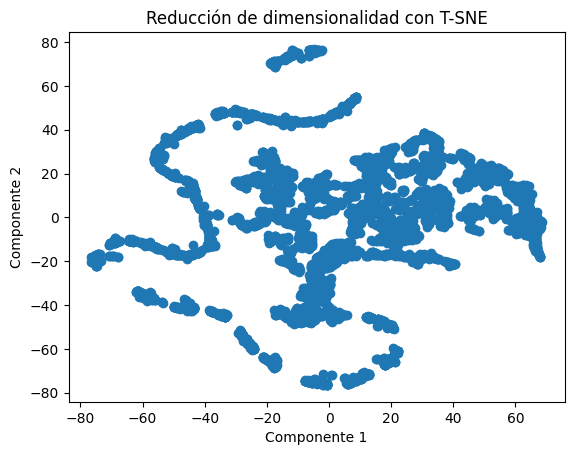

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Paso 1: Obtener características LRMFP utilizando la función custom_features y FunctionTransformer
feature_transformer = FunctionTransformer(custom_features)
step1 = ('feature_extraction', feature_transformer)

# Paso 2: Aplicar MinMax scaler a todas las columnas generadas en el paso anterior
scaler = MinMax()
columns_to_transform = ['Length', 'Recency', 'Monetary', 'Frequency', 'Periodicity']
step2 = ('minmax_scaling', ColumnTransformer([('minmax', scaler, columns_to_transform)]))

# Paso 3: Obtener las 2 componentes más relevantes utilizando T-SNE
tsne = TSNE(n_components=2, random_state=42)
step3 = ('tsne', tsne)

# Crear el pipeline
pipeline = Pipeline([step1, step2, step3])

# Aplicar las transformaciones al dataset LRMFP
transformed_data = pipeline.fit_transform(df_retail)

# Graficar las componentes obtenidas en la reducción de dimensionalidad
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Reducción de dimensionalidad con T-SNE')
plt.show()

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

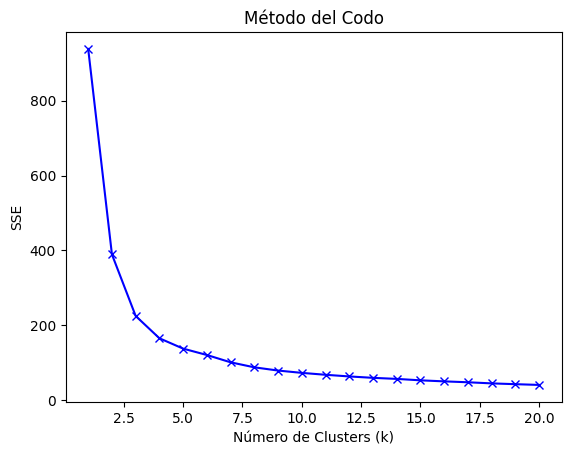

In [96]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Crear una lista con los valores de k que queremos probar
k_values = range(1, 21)

# Crear una lista para almacenar los valores de la suma de los cuadrados de las distancias
sse_values = []

for k in k_values:
    # Paso 3: Aplicar el algoritmo K-means con el valor de k actual
    kmeans = KMeans(n_clusters=k, n_init = 10,  random_state=42)
    step3 = ('kmeans', kmeans)

    # Crear el pipeline
    pipeline = Pipeline([step1, step2, step3])

    # Aplicar el pipeline al dataset LRMFP
    pipeline.fit(df_retail)

    # Obtener la suma de los cuadrados de las distancias (SSE) y agregarla a la lista
    sse_values.append(pipeline.named_steps['kmeans'].inertia_)

# Graficar el método del codo
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

En base al método del codo, se elige un valor de $k=5$, esto dado que a partir de este punto nos encontramos con ganancias mininas, en el sentido de que el $SSE$ disminuye más lentamente con el aumento del número de clusters.

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**

In [106]:
# Paso 1: Obtener características LRMFP utilizando la función custom_features y FunctionTransformer
k = 5 # Valor de k seleccionado
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
step3 = ('kmeans', kmeans)

# Crear el pipeline
pipeline = Pipeline([step1, step2, step3])

# Aplicar el pipeline al dataset original
pipeline.fit(df_retail)
# Obtener las etiquetas de clúster asignadas a cada muestra
labels = pipeline.named_steps['kmeans'].labels_

# Agregar las etiquetas de clúster al DataFrame original
df_retail_clusters = caracteristicas_lrmfp_observacion.copy()
df_retail_clusters['Cluster'] = labels



Se elige utilizar la mediana como medida de agregación para evitar confusión al interpretar periodicidades bajas, principalmente debido a que una periodicidad baja implica un cliente frecuente, pero una periodicidad de 0 referencia a un cliente que no ha vuelto a visitar el negocio.

In [107]:
# Calcular las medianas de cada atributo agrupados por el clúster
cluster_means = df_retail_clusters.groupby('Cluster').median()

# Imprimir la tabla de promedios
cluster_means

,Length,Recency,Monetary,Frequency,Periodicity
Cluster,,,,,
0,331.0,4571.0,18.223980,8.0,23.518774
1,173.0,4615.0,18.045873,3.0,18.354533
2,0.0,4808.0,16.830212,1.0,0.000000
3,0.0,4599.0,16.625641,1.0,0.000000
4,276.0,4584.0,17.439338,4.0,76.801322


Según las agrupaciones realizadas, los clientes se pueden caracterizar de la siguiente forma:
- Aquellos que no son fieles al negocio y han aportado relativamente poco en sus ingresos (Clusters 2 y 3). Diferenciandose principalmente entre aquellos que han visitado más recientemente(Cluster 2), y los que llevan más tiempo sin visitar el negocio (Cluster 3).
- Aquellos que han aportado relativamente más que otros grupos monetariamente, y tienen cierta lealtad al negocio (Clusters 0 y 1). Diferenciandose principalmente en el tiempo transcurrido entre la primera y última visita, así como la frecuencia y periodicidad de visita.
- Aquellos que tienen cierta lealtad al negocio y han aportado un nivel intermedio en los ingresos del negocio, pero cuya periodicidad de visita es mucho más alta que la de otros grupos (Cluster 4).



En base a estas agrupaciones, se puede concluir que el algoritmo de clustering ha obtenido resultados coherentes.

**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

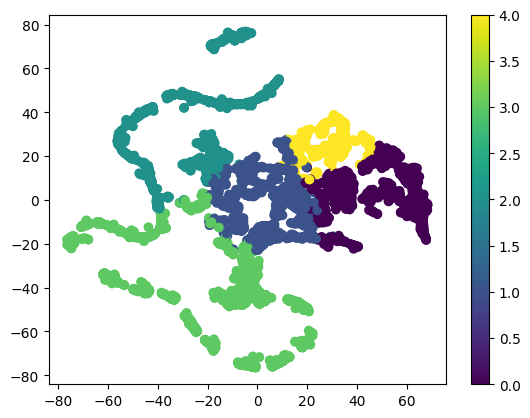

In [99]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar las proyecciones con las etiquetas de clúster como color
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')

# Agregar una barra de color
cbar = plt.colorbar(scatter)

# Mostrar la figura
plt.show()

Efectivamente, los grupos formados por el algoritmo de clustering son bien distinguibles entre sí, en el sentido de que no se suelen cruzar muestras de distintos grupos. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>